# The Intern Academy (Task 1)
# Author : Vidhi Bharadwaj


# Importing necessary libraries

In this task I have performed Exploratory Data Analysis on the "Titanic Machine Learning Dataset" , where in i have used pandas, seaborn, matplotlib libraries. I have performed basic analysis on this dataset.

Dataset Link:https://www.kaggle.com/shuofxz/titanic-machine-learning-from-disaster/metadata

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

# Reading the  train dataset

In [2]:
train=pd.read_csv(r'C:\Users\bhara\AppData\Local\Programs\Python\Python38\Scripts\train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.shape

(891, 12)

# Reading the test dataset

In [4]:
test=pd.read_csv(r'C:\Users\bhara\AppData\Local\Programs\Python\Python38\Scripts\test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
test.shape

(418, 11)

# Different datatypes

In [6]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# Cleaning Data

In [7]:
#train missing values
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
#test missing data
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<AxesSubplot:>

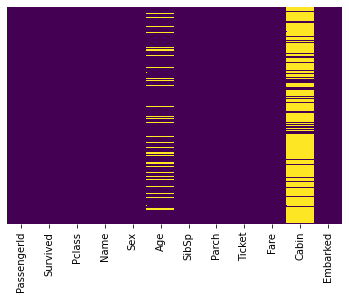

In [9]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [10]:
train.drop('Cabin',axis=1,inplace=True)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


#  Filling in Missing Data

#Fill missing values
train.Embarked.value_counts()
train.Embarked.fillna('S',inplace=True)
train.isnull().sum()

In [11]:
train.drop('Age',axis=1,inplace=True)
test.drop(['Age','Cabin'],axis=1,inplace=True)

In [12]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [13]:
test.Fare.fillna(test.Fare.mean(),inplace=True)
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Remove Outliers

In [14]:
train['Fare']=train[train['Fare']<=400]

# EDA

<AxesSubplot:xlabel='Survived', ylabel='count'>

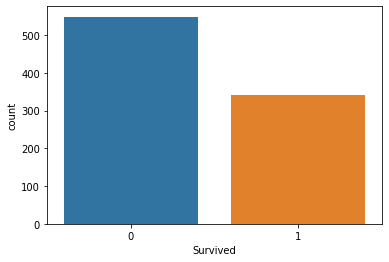

In [15]:
# 0 represents not survived and 1 represents survived
sns.countplot(x='Survived',data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

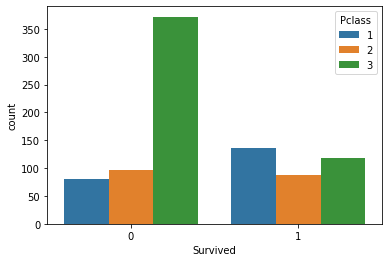

In [16]:
sns.countplot(x='Survived',hue='Pclass',data=train)

<AxesSubplot:xlabel='Survived', ylabel='Density'>

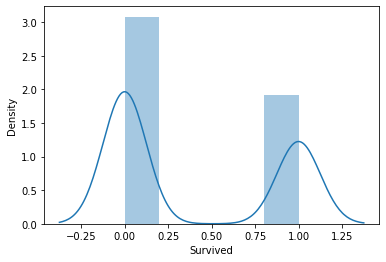

In [17]:
sns.distplot(train["Survived"])

<AxesSubplot:xlabel='Pclass', ylabel='Density'>

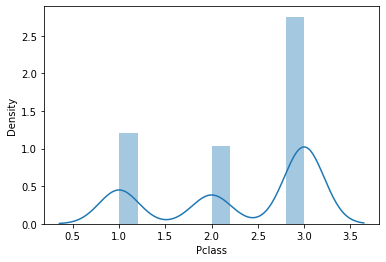

In [19]:
sns.distplot(train["Pclass"])

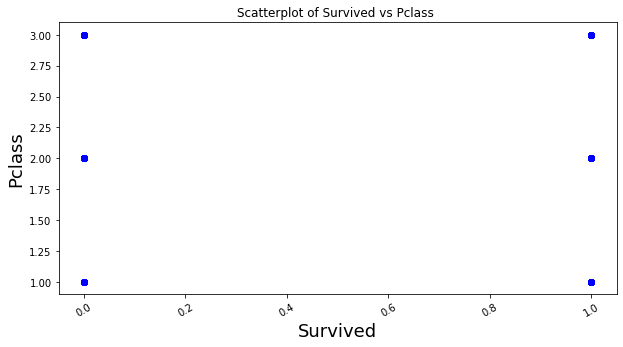

In [20]:
plt.figure(figsize=(10,5))
plt.scatter(train['Survived'],train['Pclass'],c='blue') 
plt.xlabel('Survived',fontsize=18) 
plt.ylabel('Pclass',fontsize=18)
plt.xticks(rotation=30)
plt.title('Scatterplot of Survived vs Pclass ') 
plt.show()

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

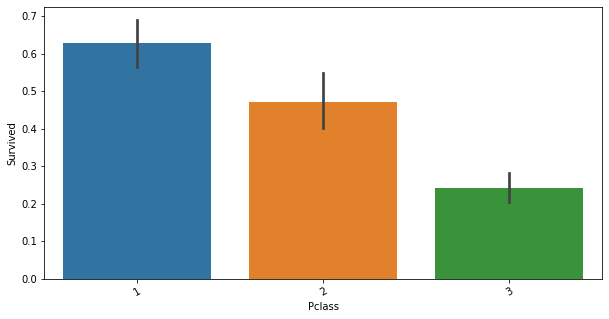

In [21]:
plt.subplots(figsize = (10,5))
plt.xticks(rotation=30)
sns.barplot(data = train,x = 'Pclass', y = 'Survived') 

In [22]:
train.describe()

,PassengerId,Survived,Pclass,SibSp,Parch
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.523008,0.381594
std,257.353842,0.486592,0.836071,1.102743,0.806057
min,1.000000,0.000000,1.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,0.000000,0.000000
75%,668.500000,1.000000,3.000000,1.000000,0.000000
max,891.000000,1.000000,3.000000,8.000000,6.000000


In [23]:
train.groupby('Survived').mean()

,PassengerId,Pclass,SibSp,Parch
Survived,,,,
0,447.016393,2.531876,0.553734,0.329690
1,444.368421,1.950292,0.473684,0.464912


In [24]:
train.groupby('Sex').mean()

,PassengerId,Survived,Pclass,SibSp,Parch
Sex,,,,,
female,431.028662,0.742038,2.159236,0.694268,0.649682
male,454.147314,0.188908,2.389948,0.429809,0.235702


# Correlation Matrix

In [25]:
train.corr()

,PassengerId,Survived,Pclass,SibSp,Parch
PassengerId,1.000000,-0.005007,-0.035144,-0.057527,-0.001652
Survived,-0.005007,1.000000,-0.338481,-0.035322,0.081629
Pclass,-0.035144,-0.338481,1.000000,0.083081,0.018443
SibSp,-0.057527,-0.035322,0.083081,1.000000,0.414838
Parch,-0.001652,0.081629,0.018443,0.414838,1.000000


<AxesSubplot:>

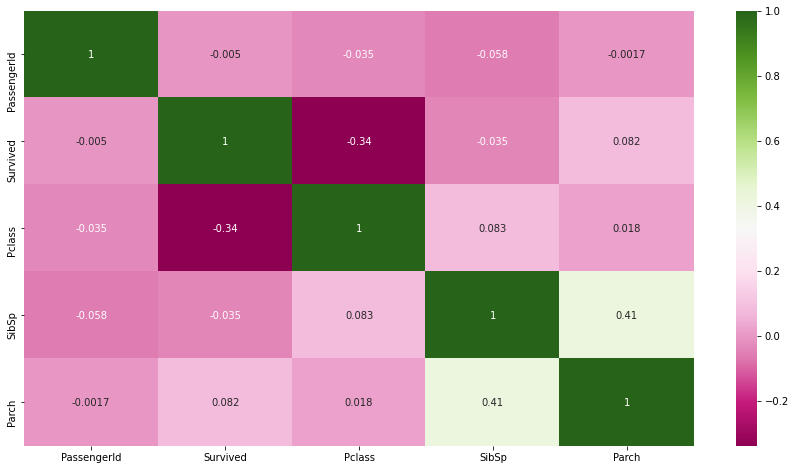

In [26]:
#heatmap
plt.subplots(figsize=(15,8))
sns.heatmap(train.corr(),annot=True,cmap='PiYG')

# Filling Null values

In [27]:
train = train.drop(['Name','Ticket','Fare'],axis='columns')
cols = ['SibSp','Parch']
for col in cols: 
    train[col].fillna(train[col].median(),inplace=True)
    

In [28]:
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked
0,1,0,3,male,1,0,S
1,2,1,1,female,1,0,C
2,3,1,3,female,0,0,S
3,4,1,1,female,1,0,S
4,5,0,3,male,0,0,S


In [29]:
test = test.drop(['Name','Ticket','Fare'],axis='columns')
cols = ['SibSp','Parch']
for col in cols: 
    test[col].fillna(test[col].median(),inplace=True)

In [30]:
test.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked
0,892,3,male,0,0,Q
1,893,3,female,1,0,S
2,894,2,male,0,0,Q
3,895,3,male,0,0,S
4,896,3,female,1,1,S
